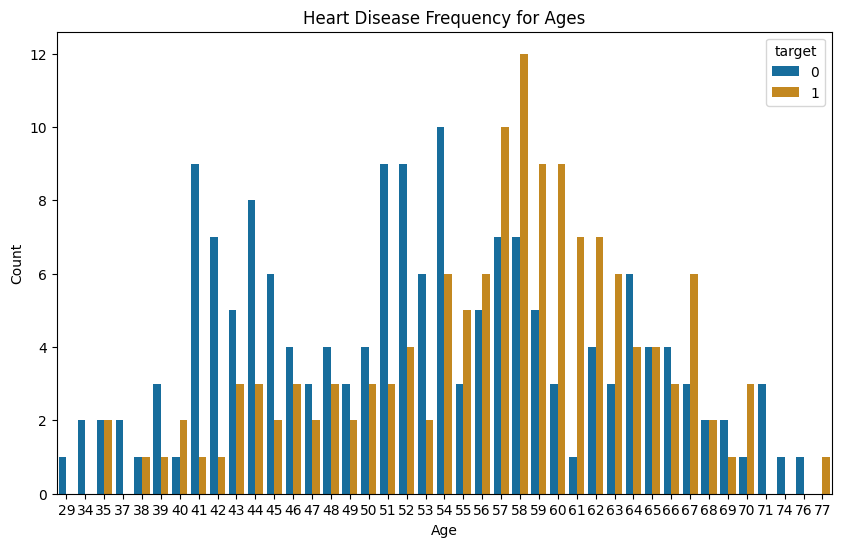

In [44]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleveland.csv", header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df['thal'].mean())
df['ca'] = df.ca.fillna(df['ca'].mean())

# Distribution of target vs age
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='target', data=df, palette='colorblind')
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

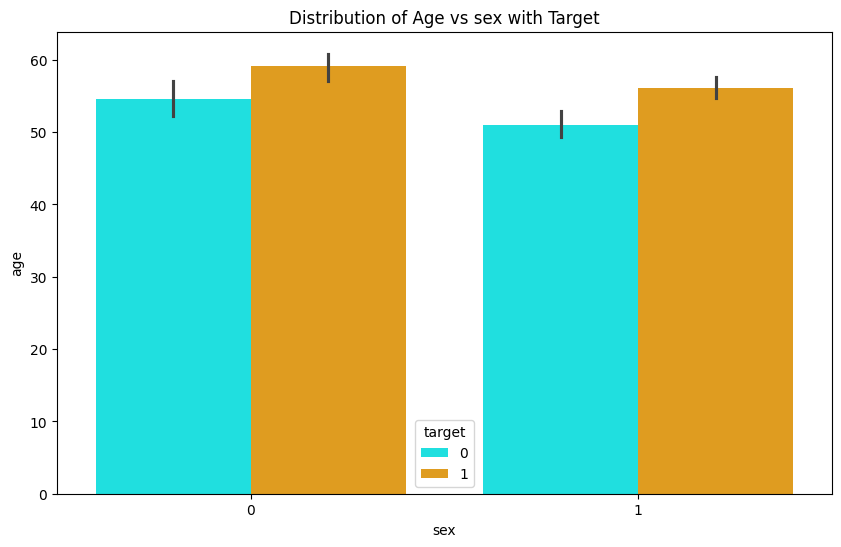

In [45]:
# barplot of age vs sex with hue = target
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='age', hue='target', data=df, palette={0: "cyan", 1: "orange"})
plt.title('Distribution of Age vs sex with Target')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
    random_state=42)

# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           weights='uniform', 
                           algorithm='auto', 
                           leaf_size=30, 
                           p=2, 
                           metric='minkowski')
                           
knn.fit(x_train, y_train)

# Predictions
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Calculate and print accuracy
accuracy_for_train = np.round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test), 2)

print("Accuracy for training set = {}".format(accuracy_for_train))
print("Accuracy for test set = {}".format(accuracy_for_test))

Accuracy for training set = 0.76
Accuracy for test set = 0.69


In [47]:
# SVM
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
    random_state=42)
    
from sklearn.svm import SVC

svc = SVC(kernel= "rbf", random_state= 42)
svc.fit(x_train, y_train)

# Predictions
y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)

# Confusion Matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Calculate and print accuracy
accuracy_for_train = np.round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test), 2)

print("Accuracy for training set = {}".format(accuracy_for_train))
print("Accuracy for test set = {}".format(accuracy_for_test))

Accuracy for training set = 0.66
Accuracy for test set = 0.67


In [48]:
# Naive Bayes
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
    random_state=42)

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

# Predictions
y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)

# Confusion Matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Calculate and print accuracy
accuracy_for_train = np.round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test), 2)

print("Accuracy for training set = {}".format(accuracy_for_train))
print("Accuracy for test set = {}".format(accuracy_for_test))

Accuracy for training set = 0.66
Accuracy for test set = 0.67


In [49]:
# Decision Tree
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
    random_state=42)

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',
                            max_depth=10,
                            min_samples_split=2)

dt.fit(x_train, y_train)

# Predictions
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

# Confusion Matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Calculate and print accuracy
accuracy_for_train = np.round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test), 2)

print("Accuracy for training set = {}".format(accuracy_for_train))
print("Accuracy for test set = {}".format(accuracy_for_test))

Accuracy for training set = 1.0
Accuracy for test set = 0.74


In [50]:
# Random Forest
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
    random_state=42)
    
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',
                            max_depth=10,
                            min_samples_split=2,
                            n_estimators=10,
                            random_state=42)

rf.fit(x_train, y_train)

# Predictions
y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)

# Confusion Matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Calculate and print accuracy
accuracy_for_train = np.round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test), 2)

print("Accuracy for training set = {}".format(accuracy_for_train))
print("Accuracy for test set = {}".format(accuracy_for_test))

Accuracy for training set = 0.66
Accuracy for test set = 0.67


In [51]:
# AdaBoost
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
    random_state=42)

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
ada.fit(x_train, y_train)

# Predictions
y_pred_train = ada.predict(x_train)
y_pred_test = ada.predict(x_test)

# Confusion Matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Calculate and print accuracy
accuracy_for_train = np.round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test), 2)

print("Accuracy for training set = {}".format(accuracy_for_train))
print("Accuracy for test set = {}".format(accuracy_for_test))

Accuracy for training set = 0.91
Accuracy for test set = 0.84


c:\Users\quanb\anaconda3\envs\ts\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [52]:
# Gradient Boosting
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
    random_state=42)

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                min_samples_split=2, max_depth=3, 
                                subsample=1.0,random_state=42)

gb.fit(x_train, y_train)

# Predictions
y_pred_train = gb.predict(x_train)
y_pred_test = gb.predict(x_test)

# Confusion Matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Calculate and print accuracy
accuracy_for_train = np.round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test), 2)

print("Accuracy for training set = {}".format(accuracy_for_train))
print("Accuracy for test set = {}".format(accuracy_for_test))

Accuracy for training set = 1.0
Accuracy for test set = 0.85


In [53]:
# XGBoost
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
    random_state=42)

from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, objective = "binary:logistic", random_state=42)
xgb.fit(x_train, y_train)

# Predictions
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

# Confusion Matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Calculate and print accuracy
accuracy_for_train = np.round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test), 2)

print("Accuracy for training set = {}".format(accuracy_for_train))
print("Accuracy for test set = {}".format(accuracy_for_test))

Accuracy for training set = 1.0
Accuracy for test set = 0.87


In [54]:
# Stacking
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
    random_state=42)

dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier(KNeighborsClassifier())
xgb = XGBClassifier(random_state=42)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel= "rbf", random_state= 42)
ad = AdaBoostClassifier(random_state=42)

from sklearn.ensemble import StackingClassifier

estimators = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('xgb', xgb),
                ('gc', gc), ('svc', svc), ('ad', ad)]

sc = StackingClassifier(estimators=estimators, final_estimator=xgb)
sc.fit(x_train, y_train)

# Predictions
y_pred_train = sc.predict(x_train)
y_pred_test = sc.predict(x_test)

# Confusion Matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Calculate and print accuracy
accuracy_for_train = np.round((cm_train[0, 0] + cm_train[1, 1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0, 0] + cm_test[1, 1]) / len(y_test), 2)

print("Accuracy for training set = {}".format(accuracy_for_train))
print("Accuracy for test set = {}".format(accuracy_for_test))

InvalidParameterError: The 'n_neighbors' parameter of KNeighborsClassifier must be an int in the range [1, inf) or None. Got <class 'sklearn.neighbors._classification.KNeighborsClassifier'> instead.